<a href="https://colab.research.google.com/github/arque1393/DeepLearningNote/blob/main/Tensorflow-practice/Note1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Basic Tensorflow code 

``` python

# Basic ANN Model using Keras

from tensorflow import keras

# create a simple model
model = keras.Sequencial(        [
            keras.Layers.Dense(units=1, input_shape=[]),
            ])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)

```

### Load and Normalize the Fashion MNIST dataset

In [ ]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Analisis of Data

#### Creating callback 


In [ ]:
class CallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    if(logs.get('loss')<0.01):
      print("\nLoss is lower than 0.4 so cancelling training")
      self.model.stop_training=True
# creating a callback instance 
callback=CallBack()



#### Define and Training the model

In [ ]:
# Define and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input data will come from mofrl.fit method 
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
])
model.compile(optimizer=tf.optimizers.Adam(), # 'adam'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
    


In [ ]:
# Training Model 
model.fit(x_train, y_train, epochs=20, callbacks=[callback])



### CNN Basics 

> Conv2D 
``` python 
tf.keras.layers.Conv2D(
    filters,               kernel_size,          strides=(1, 1),
    padding='valid',       data_format=None,     dilation_rate=(1, 1),
    groups=1,              activation=None,      use_bias=True,
    kernel_initializer='glorot_uniform',   bias_initializer='zeros',
    kernel_regularizer=None,               bias_regularizer=None,
    activity_regularizer=None,             kernel_constraint=None,
    bias_constraint=None,                  **kwargs
)
```
> MaxPool2D
``` python 
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),        strides=None,
    padding='valid',         data_format=None,
    **kwargs
)
```

In [ ]:
# import and load 

import tensorflow as tf 
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

#### Mnist model training using CNN

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions 
  tf.keras.layers.Conv2D(32, # No of filters That apply random sequence
                         (3,3), #size of the each filters
                         activation='relu', input_shape=(28, 28, 1)),

  tf.keras.layers.MaxPooling2D(2, 2), # adding MaxPool Layer
  # Second group of conv2D and Maxpool2D
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

#### Visualizing the Convolutions and Pooling

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


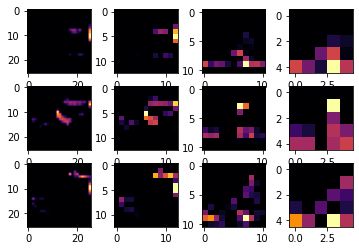

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

#### fit and evaluate 

In [ ]:

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4711 - accuracy: 0.8304
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3164 - accuracy: 0.8846
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2710 - accuracy: 0.8992
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2433 - accuracy: 0.9103
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2197 - accuracy: 0.9180

MODEL EVALUATION:
313/313 [==============================] - 3s 8ms/step - loss: 0.2689 - accuracy: 0.8977


### Human Vs Horse Clasificatio 

##### ImageDataGenerator class AND ImageDataGenerator.flow_from_directory method

> constructor of ImageDataGenerator class
``` python 
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,               samplewise_center=False,
    featurewise_std_normalization=False,    samplewise_std_normalization=False,
    zca_whitening=False,     zca_epsilon=1e-06,       rotation_range=0,
    width_shift_range=0.0,   height_shift_range=0.0,  brightness_range=None,
    shear_range=0.0,         zoom_range=0.0,          channel_shift_range=0.0,
    fill_mode='nearest',     cval=0.0,                horizontal_flip=False,
    vertical_flip=False,     rescale=None,            preprocessing_function=None,
    data_format=None,         validation_split=0.0,    interpolation_order=1,
    dtype=None
)
```
> ImageDataGenerator.flow_from_directory
``` python
flow_from_directory(
    directory,
    target_size=(256, 256),     color_mode='rgb',     classes=None,
    class_mode='categorical',   batch_size=32,        shuffle=True,
    seed=None,                  save_to_dir=None,     save_prefix='',
    save_format='png',          follow_links=False,   subset=None,
    interpolation='nearest',    keep_aspect_ratio=False
)
```
> RMSprop optimizer class
``` python
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,   rho=0.9,          momentum=0.0,
    epsilon=1e-07,         centered=False,   name='RMSprop',
    **kwargs
)
```

#### Collecting and pre-process data 

In [26]:
# fetching data from wget package on /content/ directory
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
!ls

--2022-05-30 00:47:04--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   155MB/s    in 0.9s    

2022-05-30 00:47:05 (155 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2022-05-30 00:47:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

In [31]:
# Let us unzip it using python zipfile module 
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [32]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [34]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse09-4.png', 'horse40-5.png', 'horse09-8.png', 'horse33-9.png', 'horse02-3.png', 'horse07-1.png', 'horse26-8.png', 'horse49-5.png', 'horse21-8.png', 'horse01-2.png']
TRAIN SET HUMANS: ['human01-19.png', 'human08-11.png', 'human02-01.png', 'human05-28.png', 'human11-27.png', 'human08-16.png', 'human13-21.png', 'human09-23.png', 'human13-24.png', 'human09-05.png']
VAL SET HORSES: ['horse4-541.png', 'horse2-069.png', 'horse3-055.png', 'horse2-224.png', 'horse5-400.png', 'horse2-314.png', 'horse4-345.png', 'horse4-495.png', 'horse1-105.png', 'horse5-076.png']
VAL SET HUMANS: ['valhuman02-10.png', 'valhuman02-01.png', 'valhuman01-21.png', 'valhuman04-05.png', 'valhuman03-11.png', 'valhuman03-07.png', 'valhuman04-22.png', 'valhuman01-06.png', 'valhuman03-05.png', 'valhuman05-20.png']


In [36]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')


total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


#### visualization of data image 

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

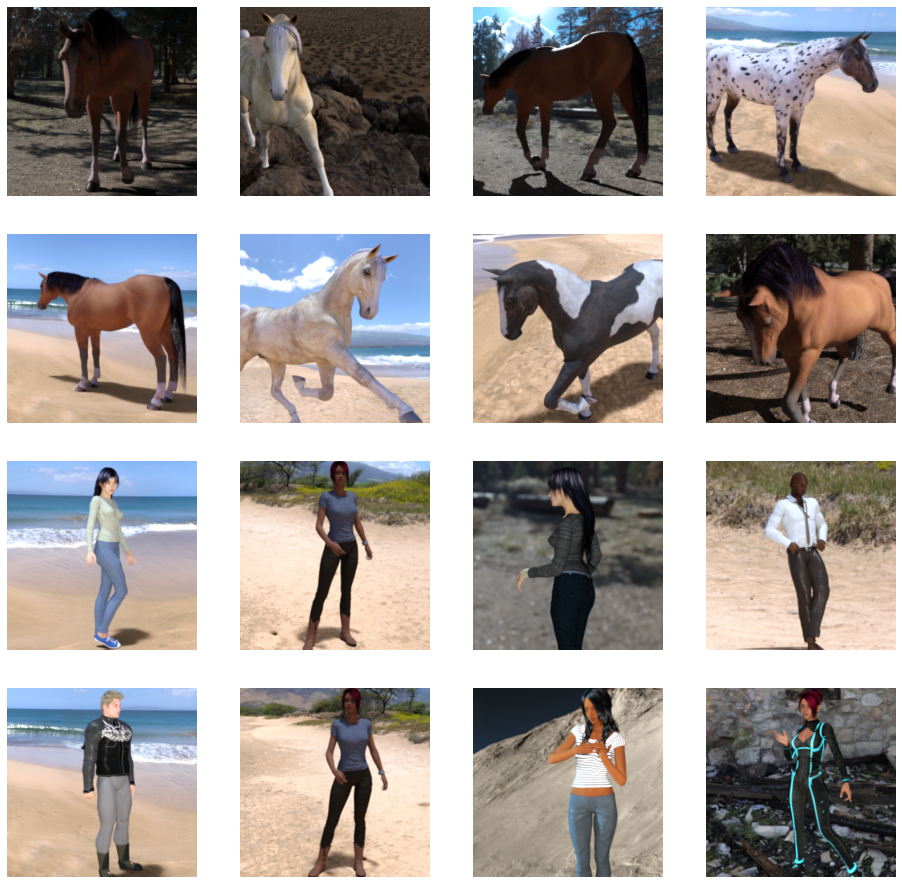

In [38]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### Data Processing 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#### Model Define and Training 

In [9]:
import tensorflow as tf 

In [10]:
# model Defining 
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
# Compiling model 

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(
                  learning_rate=0.001
                  ),
              metrics=['accuracy'])

In [13]:
# Fiting the model and training 
history = model.fit(
      train_generator, steps_per_epoch=8,  
      epochs=15,        verbose=1
      )

Epoch 1/15
8/8 [==============================] - 73s 9s/step - loss: 5.2128 - accuracy: 0.5150
Epoch 2/15
8/8 [==============================] - 70s 9s/step - loss: 0.6771 - accuracy: 0.5773
Epoch 3/15
8/8 [==============================] - 72s 9s/step - loss: 0.6285 - accuracy: 0.6952
Epoch 4/15
8/8 [==============================] - 70s 10s/step - loss: 0.6205 - accuracy: 0.7386
Epoch 5/15
8/8 [==============================] - 71s 9s/step - loss: 0.4299 - accuracy: 0.7842
Epoch 6/15
8/8 [==============================] - 73s 9s/step - loss: 0.2684 - accuracy: 0.8877
Epoch 7/15
8/8 [==============================] - 71s 9s/step - loss: 0.3939 - accuracy: 0.8365
Epoch 8/15
8/8 [==============================] - 71s 10s/step - loss: 0.4309 - accuracy: 0.8420
Epoch 9/15
8/8 [==============================] - 71s 9s/step - loss: 0.2768 - accuracy: 0.8832
Epoch 10/15
8/8 [==============================] - 74s 9s/step - loss: 0.1509 - accuracy: 0.9399
Epoch 11/15
8/8 [====================

#### Testing model or prediction 


In [2]:
# immports 
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [14]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

MessageError: ignored

#### Visualizing Intermediate Representations

In [3]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')